In [548]:
import astroplan
import numpy as np
from astroquery.mast import Catalogs
from astroplan.plots import plot_airmass
from observability import *

apply some ipython magic

In [296]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# show more columns in pandas data frames
pd.set_option('display.max_columns', 500)
pd.set_option('precision',2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Specify Parameters

In [367]:
alertsFile = 'data/toi-2019-03-23.csv'
lastUpdate = '2019-03-15'
earliestObs = str(np.datetime64('today'))
latestObs = '2019-12-30 12:00'

Teff_max = 3800

In [44]:
CAHA = define_observer()

### Read alerts
Specify minimum time in column "Updated" (=last time we checked)

In [45]:
alerts, targets = targetsFromCSV(alertsFile, minUpdated=lastUpdate)

### Define Observing Constraints

In [52]:
constraints, start_time, end_time = define_constraints(30,
        earliestObs, latestObs)

### Check Observability from CAHA Given the Constraints

In [74]:
observables = check_observability(alerts, constraints, CAHA, targets, start_time,
                                 end_time)

### Filter for M dwarf Spectral Type

Query TIC on MAST with observable objects, simultaneously filtering by effective temperature

In [145]:
observableMdwarfs = Catalogs.query_criteria(catalog="Tic",Teff=[0,Teff_max], ID=observables.tic_id).to_pandas()
observableMdwarfs

ID   version  HIP  TYC        UCAC           TWOMASS  \
0   27649847  20180610  NaN  NaN  512-044161  08132251+1213181   
1  218795833  20180610  NaN  NaN         NaN  08182567-1939465   
2  318937509  20180610  NaN  NaN  465-033001  07293155+0250532   
3  431999925  20180610  NaN  NaN         NaN  08030950-2000353   

                  SDSS              ALLWISE                 GAIA     APASS  \
0  1237667537458692210  J081322.59+121319.1   649852775500351104  41704841   
1                  NaN  J081825.63-193946.2  5707485523149430400       NaN   
2                  NaN  J072931.56+025052.8  3136226523024784896       NaN   
3                  NaN  J080309.57-200035.8  5713325132487143424       NaN   

   KIC objType typeSrc      ra    dec POSflag   pmRA  e_pmRA  pmDEC  e_pmDEC  \
0  NaN    STAR   2mass  123.34  12.22  tmgaia  94.40     2.0  84.50      2.0   
1  NaN    STAR   2mass  124.61 -19.66  tmgaia -45.14     2.0  25.22      2.0   
2  NaN    STAR   2mass  112.38   2.85  tmgaia  21.62     2.0 -39.02      2.0   
3  NaN    STAR   2mass  120.79 -20.01  tmgaia  64.87     2.0 -60.53      2.0   

   PMflag  plx  e_plx PARflag  gallong  gallat  eclong  eclat   Bmag  e_Bmag  \
0  sblink  NaN    NaN     NaN   210.90   23.64  122.81  -7.50  16.27    0.15   
1  sblink  NaN    NaN     NaN   240.60    9.04  132.81 -38.10  17.87    0.17   
2  sblink  NaN    NaN     NaN   214.74    9.77  113.68 -18.77  18.57    0.16   
3  sblink  NaN    NaN     NaN   238.95    5.82  128.51 -39.42  17.94    0.18   

    Vmag  e_Vmag   umag  e_umag   gmag    e_gmag   rmag    e_rmag   imag  \
0  14.69    0.07  17.99    0.01  15.44  3.29e-03  14.05  3.35e-03  14.86   
1  17.35    0.20    NaN     NaN    NaN       NaN    NaN       NaN    NaN   
2  17.20    0.20    NaN     NaN    NaN       NaN    NaN       NaN    NaN   
3  17.45    0.20    NaN     NaN    NaN       NaN    NaN       NaN    NaN   

   e_imag   zmag    e_zmag   Jmag  e_Jmag   Hmag  e_Hmag   Kmag  e_Kmag  \
0    0.01  12.24  3.01e-03  10.92    0.02  10.36    0.02  10.09    0.02   
1     NaN    NaN       NaN  12.85    0.03  12.23    0.03  11.95    0.02   
2     NaN    NaN       NaN  12.36    0.02  11.77    0.02  11.49    0.02   
3     NaN    NaN       NaN  13.14    0.03  12.55    0.03  12.36    0.03   

              TWOMflag  prox  w1mag  e_w1mag  w2mag  e_w2mag  w3mag  e_w3mag  \
0  AAA-222-111-000-0-0  38.4   9.98     0.02   9.85     0.02   9.73     0.05   
1  AAA-222-111-000-0-0  12.3  11.79     0.02  11.64     0.02  11.59     0.17   
2  AAA-222-111-000-0-0  20.8  11.38     0.02  11.22     0.02  11.18     0.16   
3  AAA-222-111-000-0-0   5.4  12.14     0.02  12.03     0.02  12.25     0.34   

   w4mag  e_w4mag  GAIAmag  e_GAIAmag   Tmag  e_Tmag TESSflag SPFlag    Teff  \
0   9.01      NaN    13.39   6.68e-04  12.43    0.17    cdwrf  cdwrf  3439.0   
1   8.75      NaN    15.50   2.04e-03  14.53    0.06    cdwrf  cdwrf  3225.0   
2   8.68      NaN    15.22   1.74e-03  14.15    0.06    cdwrf  cdwrf  3109.0   
3   9.01      NaN    15.88   2.58e-03  14.78    0.06    cdwrf  cdwrf  3266.0   

   e_Teff  logg  e_logg  MH  e_MH   rad  e_rad  mass  e_mass    rho  e_rho  \
0    69.0  4.97    0.44 NaN   NaN  0.27   0.05  0.25    0.06  12.83   6.75   
1   100.0  5.00    0.53 NaN   NaN  0.25   0.06  0.23    0.07  14.67   9.82   
2    98.0  5.07    0.55 NaN   NaN  0.20   0.05  0.17    0.05  20.99  14.34   
3   101.0  4.99    0.53 NaN   NaN  0.27   0.06  0.26    0.07  13.10   8.77   

  lumclass       lum     e_lum       d  e_d   ebv  e_ebv  numcont  contratio  \
0    DWARF  9.05e-03  3.17e-03   93.07  NaN  0.03    NaN     20.0   7.42e-04   
1    DWARF  6.14e-03  2.74e-03  155.42  NaN   NaN    NaN    127.0   1.14e-01   
2    DWARF  3.43e-03  1.56e-03     NaN  NaN   NaN    NaN    115.0   7.58e-01   
3    DWARF  7.42e-03  3.31e-03  190.23  NaN   NaN    NaN    192.0   7.47e-01   

  disposition duplicate_id  priority      objID  
0         NaN          NaN  2.54e-03   59095654  
1         NaN          NaN  7.62e-0

Merge the two tables

In [159]:
observableMdwarfs.rename(columns={'ID' : 'tic_id'}, inplace=True)
observableMdwarfs.tic_id = observableMdwarfs.tic_id.astype('int64')
observableMdwarfs = pd.merge(observables, observableMdwarfs, on='tic_id', how='inner')
observableMdwarfs

src     tic_id  toi_id Disposition      RA    Dec  Tmag_x  Tmag Err  \
0  spoc  431999925  513.01          PC  120.79 -20.01   14.78      0.06   
1  spoc  318937509  516.01          PC  112.38   2.85   14.15      0.06   
2  spoc  218795833  519.01          PC  124.61 -19.66   14.53      0.06   
3  spoc   27649847  521.01          PC  123.34  12.22   12.43      0.17   

      Epoc  Epoc Err  Period  Period Err  Duration  Duration Err  \
0  1492.93  8.99e-03    1.45    9.68e-04      3.68          0.72   
1  1492.65  9.49e-04    1.05    7.30e-05      1.06          0.06   
2  1491.88  4.11e-04    1.27    3.60e-05      1.24          0.03   
3  1492.72  2.57e-03    1.54    2.95e-04      1.11          0.28   

   Transit Depth  Transit Depth Err Sectors                           Created  \
0       16635.29            2183.41       7  2019-03-18 17:05:14.653120+00:00   
1       34644.95            2105.84       7  2019-03-18 17:05:12.042218+00:00   
2      139604.16            2458.30       7  2019-03-18 17:05:07.690774+00:00   
3        2384.40             289.33       7  2019-03-18 17:05:00.377999+00:00   

                     Updated   version  HIP  TYC        UCAC  \
0 2019-03-20 15:50:13.926867  20180610  NaN  NaN         NaN   
1 2019-03-20 15:50:13.707244  20180610  NaN  NaN  465-033001   
2 2019-03-20 15:50:13.283615  20180610  NaN  NaN         NaN   
3 2019-03-20 15:50:12.582036  20180610  NaN  NaN  512-044161   

            TWOMASS                 SDSS              ALLWISE  \
0  08030950-2000353                  NaN  J080309.57-200035.8   
1  07293155+0250532                  NaN  J072931.56+025052.8   
2  08182567-1939465                  NaN  J081825.63-193946.2   
3  08132251+1213181  1237667537458692210  J081322.59+121319.1   

                  GAIA     APASS  KIC objType typeSrc      ra    dec POSflag  \
0  5713325132487143424       NaN  NaN    STAR   2mass  120.79 -20.01  tmgaia   
1  3136226523024784896       NaN  NaN    STAR   2mass  112.38   2.85  tmgaia   
2  5707485523149430400       NaN  NaN    STAR   2mass  124.61 -19.66  tmgaia   
3   649852775500351104  41704841  NaN    STAR   2mass  123.34  12.22  tmgaia   

    pmRA  e_pmRA  pmDEC  e_pmDEC  PMflag  plx  e_plx PARflag  gallong  gallat  \
0  64.87     2.0 -60.53      2.0  sblink  NaN    NaN     NaN   238.95    5.82   
1  21.62     2.0 -39.02      2.0  sblink  NaN    NaN     NaN   214.74    9.77   
2 -45.14     2.0  25.22      2.0  sblink  NaN    NaN     NaN   240.60    9.04   
3  94.40     2.0  84.50      2.0  sblink  NaN    NaN     NaN   210.90   23.64   

   eclong  eclat   Bmag  e_Bmag   Vmag  e_Vmag   umag  e_umag   gmag  \
0  128.51 -39.42  17.94    0.18  17.45    0.20    NaN     NaN    NaN   
1  113.68 -18.77  18.57    0.16  17.20    0.20    NaN     NaN    NaN   
2  132.81 -38.10  17.87    0.17  17.35    0.20    NaN     NaN    NaN   
3  122.81  -7.50  16.27    0.15  14.69    0.07  17.99    0.01  15.44   

     e_gmag   rmag    e_rmag   imag  e_imag   zmag    e_zmag   Jmag  e_Jmag  \
0       NaN    NaN       NaN    NaN     NaN    NaN       NaN  13.14    0.03   
1       NaN    NaN       NaN    NaN     NaN    NaN       NaN  12.36    0.02   
2       NaN    NaN       NaN    NaN     NaN    NaN       NaN  12.85    0.03   
3  3.29e-03  14.05  3.35e-03  14.86    0.01  12.24  3.01e-03  10.92    0.02   

    Hmag  e_Hmag   Kmag  e_Kmag             TWOMflag  prox  w1mag  e_w1mag  \
0  12.55    0.03  12.36    0.03  AAA-222-111-000-0-0   5.4  12.14     0.02   
1  11.77    0.02  11.49    0.02  AAA-222-111-000-0-0  20.8  11.38     0.02   
2  12.23    0.03  11.95    0.02  AAA-222-111-000-0-0  12.3  11.79     0.02   
3  10.36    0.02  10.09    0.02  AAA-222-111-000-0-0  38.4   9.98     0.02   

   w2mag  e_w2mag  w3mag  e_w3mag  w4mag  e_w4mag  GAIAmag  e_GAIAmag  Tmag_y  \
0  12.03     0.02  12.25     0.34   9.01      NaN    15.88   2.58e-03   14.78   
1  11.22     0.02  11.18     0.16   8.68      NaN    15.22   1.74e-03   14.15   
2  11.64     0.02  11.59     0.17   

Display columns relevant for candidates spreadsheet

In [170]:
to_spreadsheet = observableMdwarfs[['tic_id', 'toi_id', 'RA', 'Dec', 'Teff']]
to_spreadsheet

tic_id  toi_id      RA    Dec    Teff
0  431999925  513.01  120.79 -20.01  3266.0
1  318937509  516.01  112.38   2.85  3109.0
2  218795833  519.01  124.61 -19.66  3225.0
3   27649847  521.01  123.34  12.22  3439.0

Print StarAlt-suited coordinate output for candidates

In [146]:
coordList = [print('{} {} {}'.format(o.ID, o.ra, o.dec)) for i, o in observableMdwarfs.iterrows()]

27649847 123.3438 12.2217
218795833 124.607 -19.6629
318937509 112.3815 2.8481
431999925 120.7896 -20.0098


# --work in progress--


In [551]:
candidateTargets = [t for t in targets if float(t.name) in observableMdwarfs.toi_id.unique()]

check altitude at CAHA of the targets today

<IPython.core.display.Javascript object>


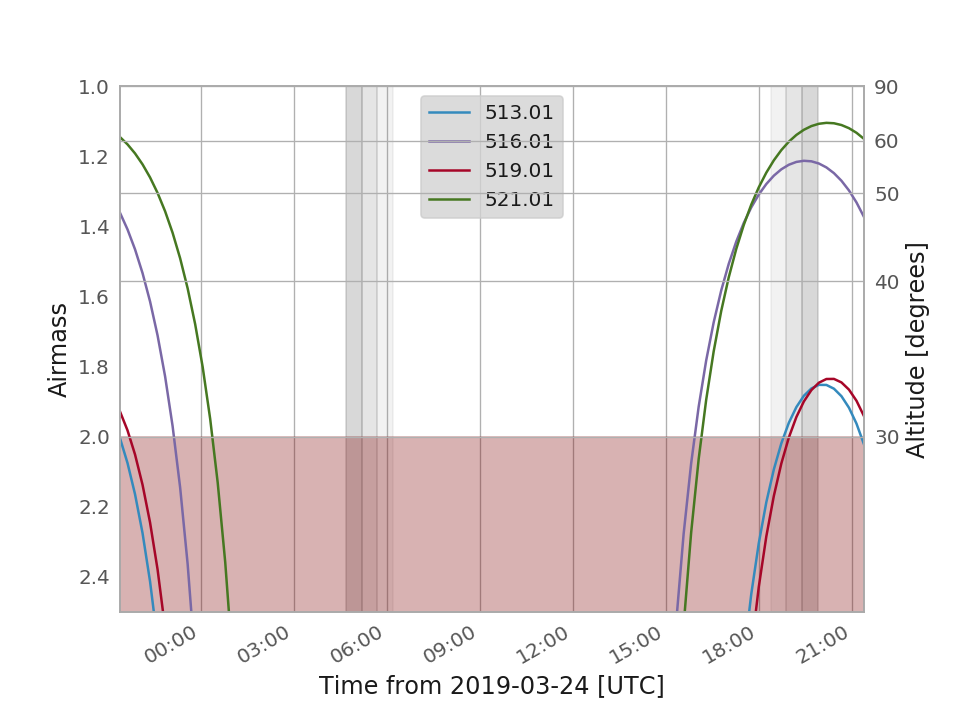

In [380]:
fig, ax = plt.subplots()
ax = plot_airmass(candidateTargets, CAHA, str(np.datetime64('now')), brightness_shading=True,
             altitude_yaxis=True, max_airmass=2.5, style_sheet=light_style_sheet)

ax.legend(facecolor='lightgray')
ax.grid(False, axis='y')

ax.axhspan(2, 3, alpha=.3, color='maroon')

plt.show()

In [455]:
%matplotlib notebook
# %matplotlib inline

visualize long-term (next few months) visibility of candidates

<IPython.core.display.Javascript object>


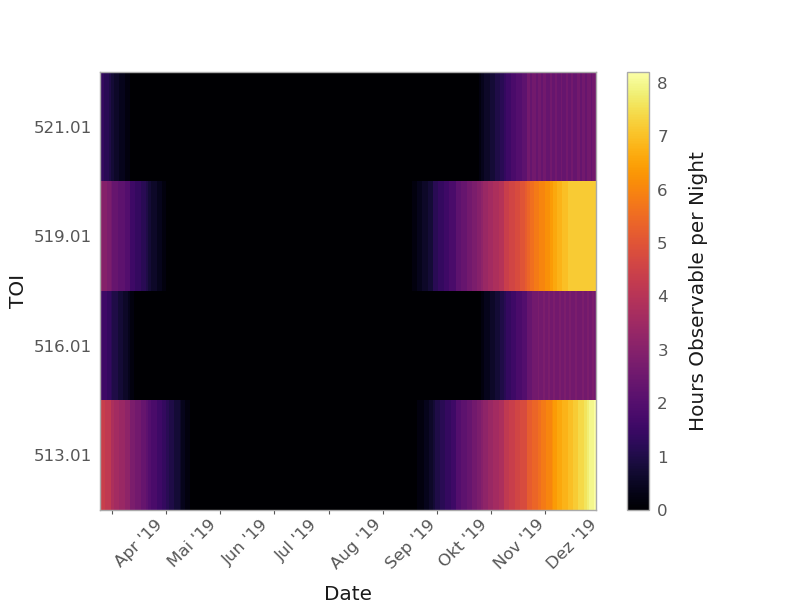

(<Figure size 800x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f481b1e5ba8>)

In [553]:
plot_observability(candidateTargets, constraints, CAHA, Time(earliestObs), Time(latestObs))

------------------------------

------------------------------

# test Paz' scripts

In [ ]:
from astropy.table import Table
import numpy as np
from astropy.table import Column
from astropy import units as u   
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
import pandas as pd
import astroplan
import datetime as dt
from astroplan import Observer 
from astroplan import FixedTarget
import requests
from lxml import html

In [ ]:
print("insert username:")
user = input('')
print("insert password:")
password = input('')

def download_tess_alert_table(user,password,table_name = 'alerts_tess_table.dat'):
    LOGIN_URL = 'https://tev.mit.edu/user/login/?next=http%3A//127.0.0.1%3A3032/toi/alerts/all/all/csv/'
    URL = 'https://tev.mit.edu/toi/alerts/all/all/csv/'
    session_requests = requests.session()
    result = session_requests.get(LOGIN_URL)
    tree = html.fromstring(result.text)
    authenticity_token = list(set(tree.xpath("//input[@name='csrfmiddlewaretoken']/@value")))[0]
    payload = {
        "username": user, 
        "password": password, 
        "csrfmiddlewaretoken": authenticity_token
              }
    result = session_requests.post(LOGIN_URL, data = payload, headers = dict(referer = LOGIN_URL))
    
    result = session_requests.get(URL, headers = dict(referer = URL))
    f = open(table_name,'w')
    f.write(str(result.content).replace(',','\t').replace(' ','_').replace('\\r\\n','\n').replace('\t\t','\t-\t').replace('\t\t','\t-\t').replace('\t\t','\t-\t').replace('\t\t','\t-\t').replace('\t\t','\t-\t')[2:-1]) 
    f.close()

    
download_tess_alert_table(user,password,table_name = 'alerts_tess_table.dat')


In [ ]:
t_alerts =  Table.read('alerts_tess_table.dat',format = 'ascii')
alerts_ticid = t_alerts['tic_id'].data.data
alerts_toi_id = t_alerts['toi_id'].data.data
ra_alerts = t_alerts['RA']*u.deg
dec_alerts = t_alerts['Dec']*u.deg
coords_alerts = SkyCoord(ra_alerts,dec_alerts,unit = u.deg)
ra_alerts=coords_alerts.ra
dec_alerts=coords_alerts.dec
T_mag = t_alerts['Tmag'].data.data
Terr_mag = t_alerts['Tmag_Err'].data.data

lista_candidatas = []
indices_candidatas = []
for j,element in enumerate(coords_alerts):
    dec = element.dec
    if dec >-23*u.deg and dec <90*u.deg:
        lista_candidatas.append(element)
        indices_candidatas.append(j)
        
#Add visibility
months_list = []

#only candidates alerts (visible from Calar Alto)
T_mag_list=[]
Terr_mag_list=[]
RA_candidatas=[]
DEC_candidatas=[]
targets_candidatas=[]
toi_candidatas = []
p=len(lista_candidatas)

In [ ]:
# this is slow.
for i in range(10):
    print(str(i)+'/'+str(p))
    location = EarthLocation.from_geodetic(-2.546111*u.deg, 37.223611*u.deg, 2168*u.m) 
    obs = Observer(location=location, name="calar", timezone="CET")
    c=[astroplan.constraints.LocalTimeConstraint(min=dt.time(19,0), max = dt.time(5,0)),astroplan.constraints.AirmassConstraint(max=2) ] 
    indices= np.array(indices_candidatas) 
    targets_candidatas.append(alerts_ticid[indices[i]])
    toi_candidatas.append(alerts_toi_id[indices[i]])
    T_mag_list.append(T_mag[indices[i]])
    Terr_mag_list.append(Terr_mag[indices[i]])
    RA_candidatas.append(ra_alerts[indices[i]].value)
    DEC_candidatas.append(dec_alerts[indices[i]].value)
    coord =lista_candidatas[i]
    target = FixedTarget(coord=coord, name=alerts_ticid[indices[i]])
    months = astroplan.months_observable(constraints=c,observer=obs,targets=[target]) 
    months = str(months).replace(' ','').replace('[','').replace(']','') 
    months_list.append(months)

In [ ]:
t_car_tess =  Table.read('Paz/colnames_carmenes_tess.dat',format = 'ascii')
name_t = t_car_tess['tess'].data
name_c = t_car_tess['Karmn']
c=np.array(targets_candidatas)
d=c.astype(str)
id_carmenes = []
for i,tic in enumerate(d):
    j = np.where(name_t==tic)[0]
    if len(j)>0:
        carmen_id = name_c[j[0]]
    else:
        carmen_id ='...'
    id_carmenes.append(carmen_id)